Problem Statement: Student Grade Prediction.
Predict the final grade of Portugese high school students

In [1]:
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline                                                              

import warnings                                                                 # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

pd.set_option('display.max_columns', 100)                                       # Display all dataframe columns in outputs ()
                                                                                # This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns

studgrade = pd.read_csv("student-mat.csv")  # Load in the dataset as studgrade  

In [2]:
#check the values in loaded Dataset
studgrade.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


So procedding for any kind regression need to check the deatils of the file and perform the EDA

In [3]:
# Review the datatypes of the given dataset
studgrade.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [4]:
#checking the null values in the data and the percentage of null values
total = studgrade.isnull().sum().sort_values(ascending=False)
percent = (studgrade.isnull().sum()/studgrade.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data)

            Total  Percent
G3              0      0.0
schoolsup       0      0.0
sex             0      0.0
age             0      0.0
address         0      0.0
famsize         0      0.0
Pstatus         0      0.0
Medu            0      0.0
Fedu            0      0.0
Mjob            0      0.0
Fjob            0      0.0
reason          0      0.0
guardian        0      0.0
traveltime      0      0.0
studytime       0      0.0
failures        0      0.0
famsup          0      0.0
G2              0      0.0
paid            0      0.0
activities      0      0.0
nursery         0      0.0
higher          0      0.0
internet        0      0.0
romantic        0      0.0
famrel          0      0.0
freetime        0      0.0
goout           0      0.0
Dalc            0      0.0
Walc            0      0.0
health          0      0.0
absences        0      0.0
G1              0      0.0
school          0      0.0


So from the above we can say there is no missing values present in the data

In [5]:
studgrade.describe(include = 'all')      # Descriptive statistics for the numerical variables

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,395,395,395.000000,395.000000,395.000000,395,395,395,395,395,395,395,395,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,145,273,NaN,NaN,NaN,344,242,214,201,314,375,329,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,NaN,NaN,1.448101,2.035443,0.334177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,NaN,NaN,0.697505,0.839240,0.743651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,NaN,NaN,18.000000,NaN,NaN,NaN,4.000000,3.000000,NaN,NaN,NaN,NaN,2.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000


Initial Observations:

1)Number of schools in the given data is 2

2)Among the two schools the count of GP is more(349 among 395)

3)Number of sex present is 2 and number of F(Female) students are more(208 among 395)

4)Age is between 15 to 22

5)In the data lots of categorical variables are there.We need to do proper dummification of them.

Let us generate pandas profiling to check whether the observations are correct or not.

In [6]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(studgrade)
profile.to_file(output_file="studgradeoutputfile.html")                              # HTML file will be downloaded to your workspace

From the html file we can see there is highly corelation between G1,G2 and G3.Let us draw the heatmap to understand the corelation.

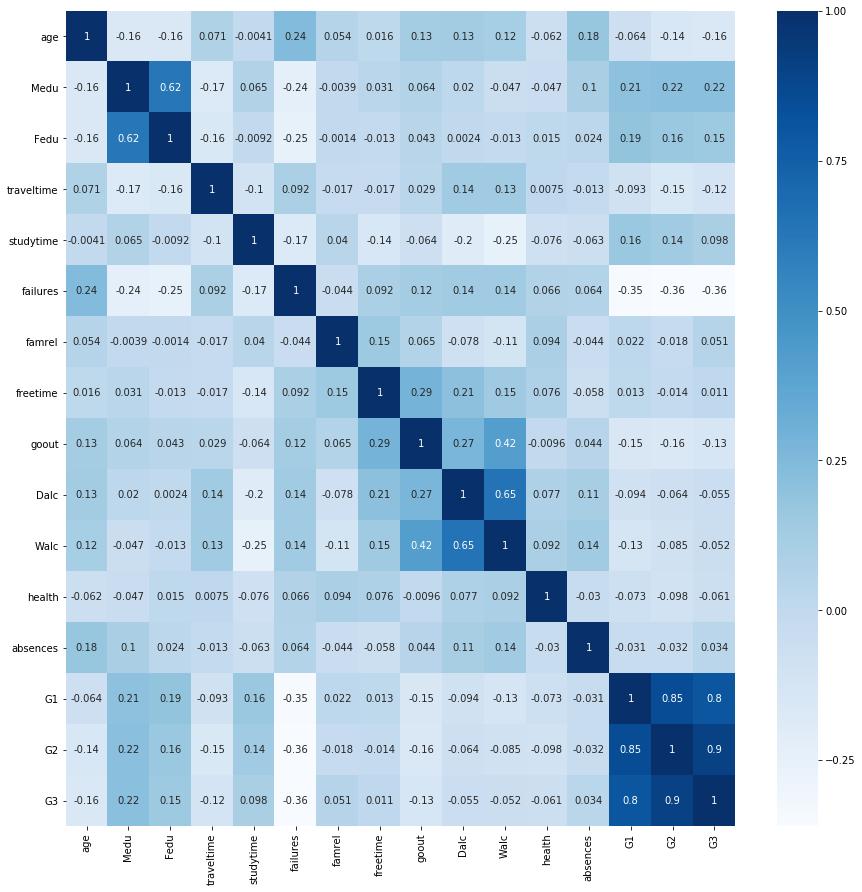

In [6]:
plt.figure(figsize=(15, 15))

sns.heatmap(studgrade.corr(), annot=True,cmap='Blues' );

So from the above map we can say there is high corelation between G1,G2,G3

From the description of column we know:
G1 first period grade (numeric: from 0 to 20)
G2 second period grade (numeric: from 0 to 20)
G3 final grade (numeric: from 0 to 20)

We are introducing a new column taking the average of all G1,G2,G3 and then drop this three columns

In [6]:
studgrade['AvgGrade']=studgrade['G1']+studgrade['G2']+studgrade['G3']/3

In [7]:
studgrade.drop(['G1','G2','G3'],axis=1,inplace=True)

In [8]:
studgrade.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,AvgGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,13.000000
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,12.000000
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,18.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,34.000000
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,19.333333


For linear regreesion there should not be any corelation between independent variables.From the above heatmap we can see there is corelation between gout and Walc, Walc and Dalc.So dropping the three column Walc.

In [9]:
studgrade.drop(['Walc'],axis=1,inplace=True)

In [10]:
studgrade.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,AvgGrade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,3,6,13.000000
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,3,4,12.000000
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,10,18.333333
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,5,2,34.000000
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,5,4,19.333333


Plotting the heatmap again

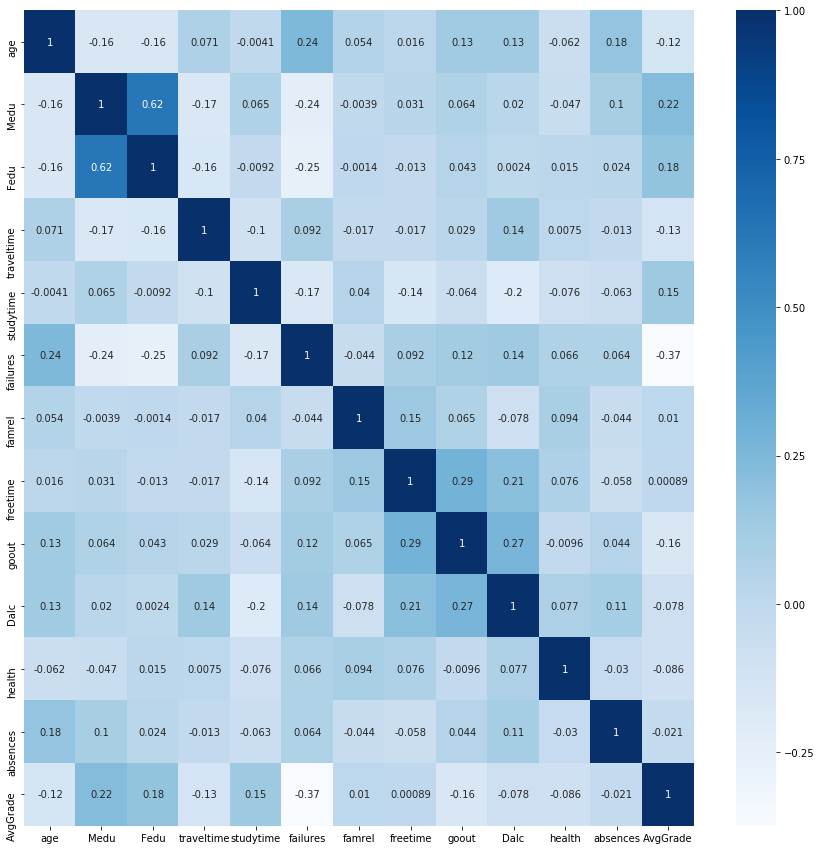

In [11]:
plt.figure(figsize=(15, 15))

sns.heatmap(studgrade.corr(), annot=True,cmap='Blues' );

The corelation exist between Medu and Fedu.So dropping Fedu.


In [12]:
studgrade.drop('Fedu',axis=1,inplace=True)

Visualising Pairwise correlation

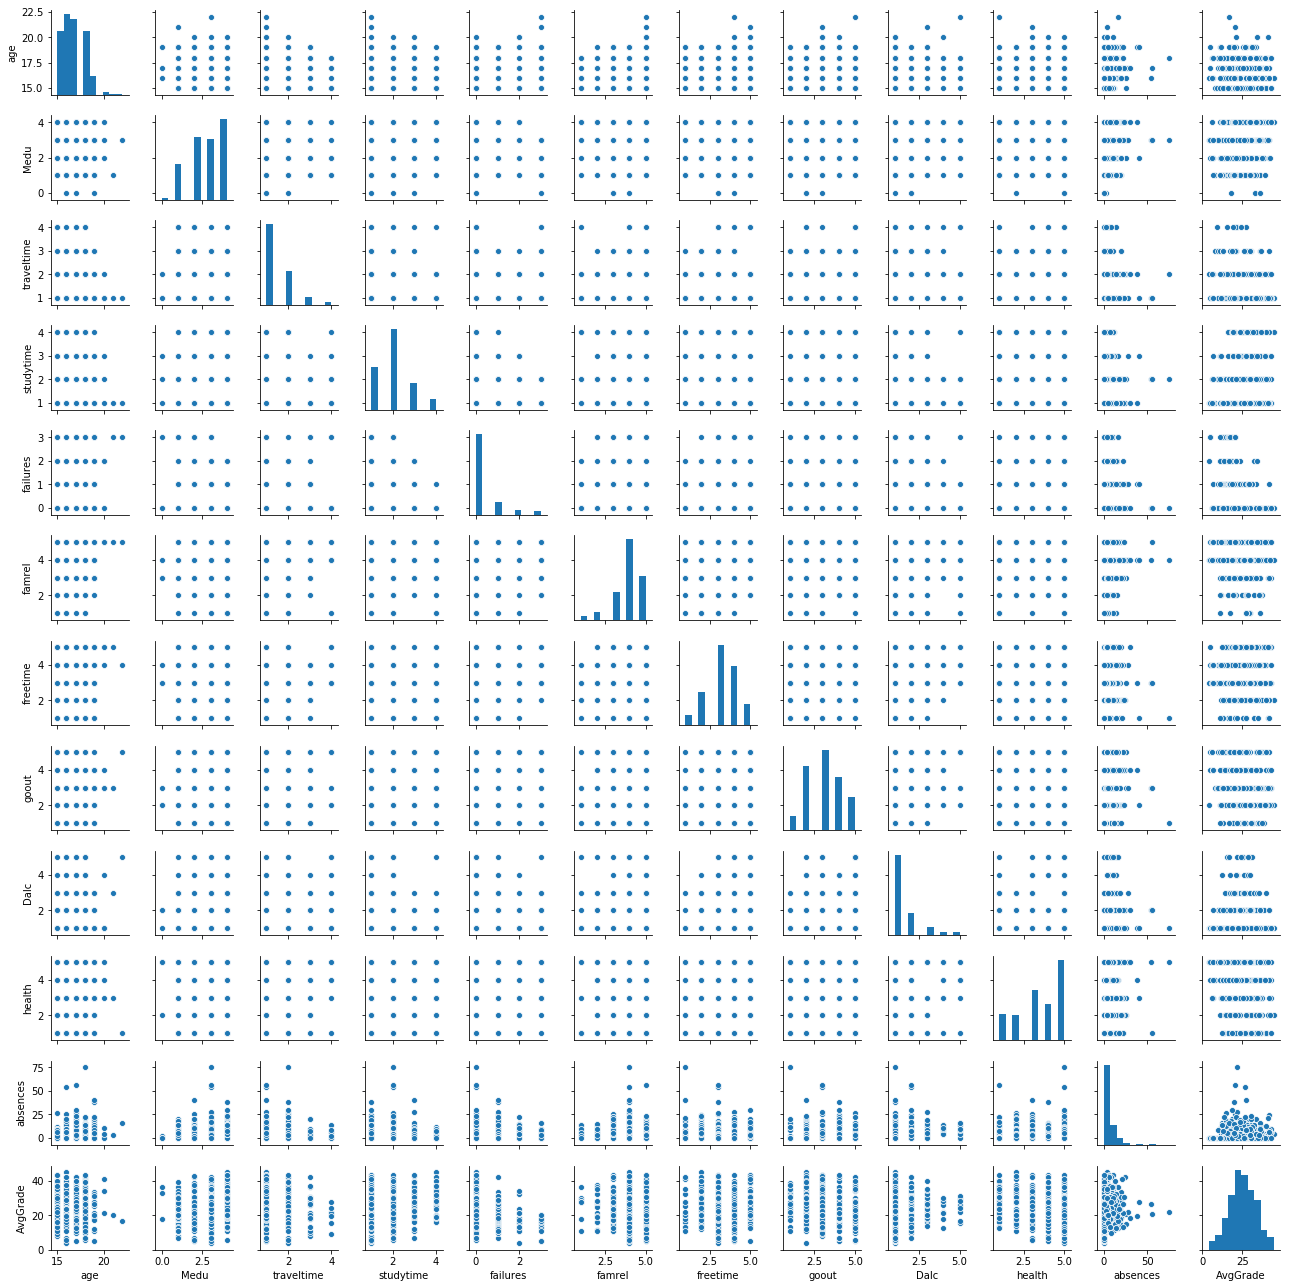

In [13]:
sns.pairplot(studgrade,size = 1.5, aspect = 1)

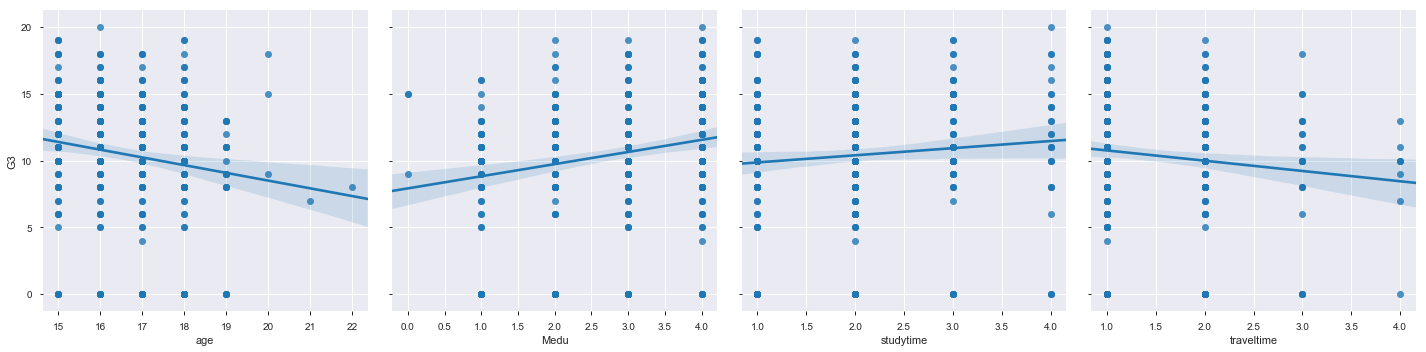

In [16]:
sns.pairplot(studgrade, x_vars=['age', 'Medu','studytime','traveltime'], y_vars='G3', size=5, aspect=1, kind='reg')

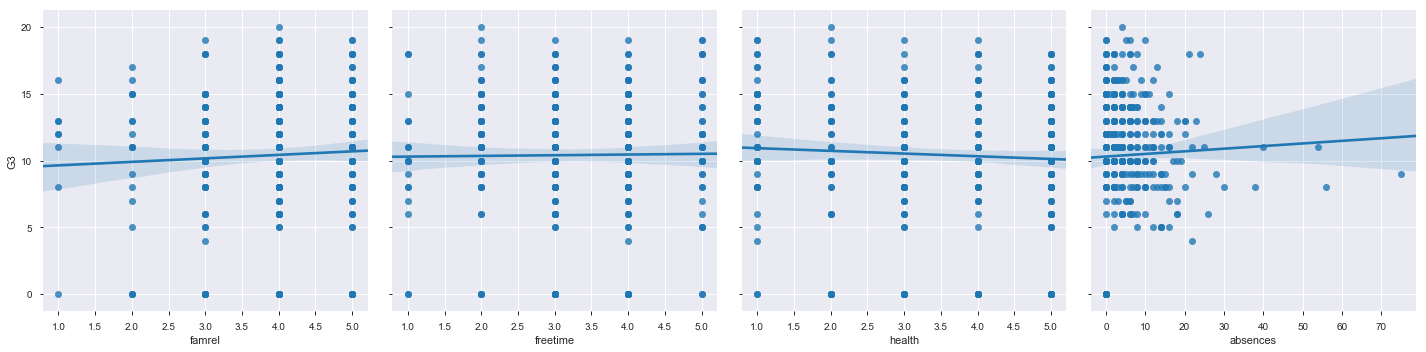

In [17]:
sns.pairplot(studgrade, x_vars=['famrel', 'freetime','health','absences'], y_vars='G3', size=5, aspect=1, kind='reg')

Is there a relationship between G3 and remaining independent variables

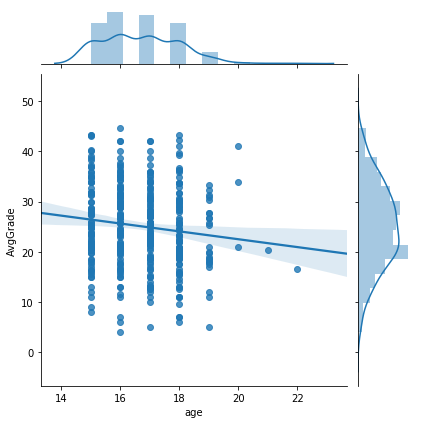

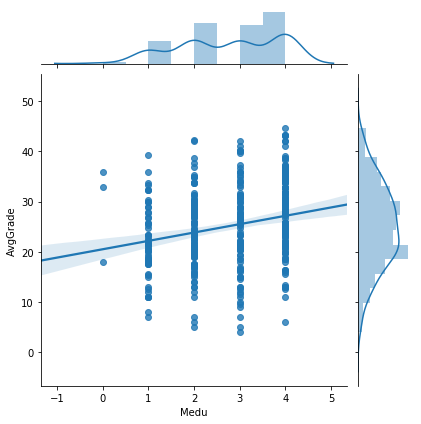

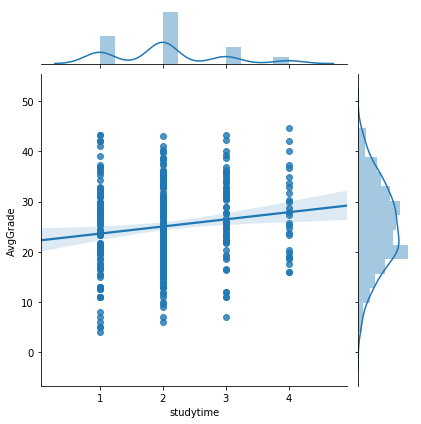

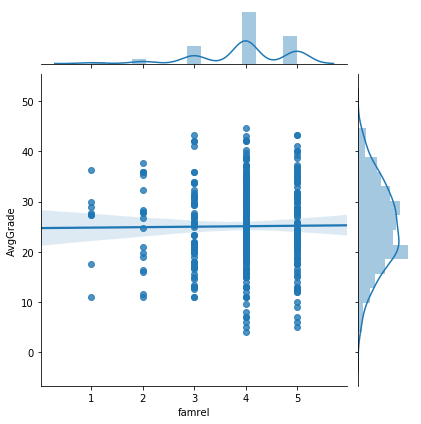

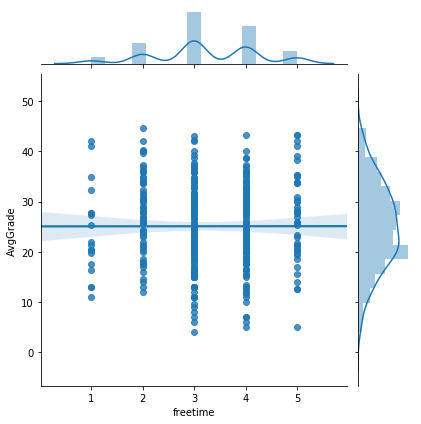

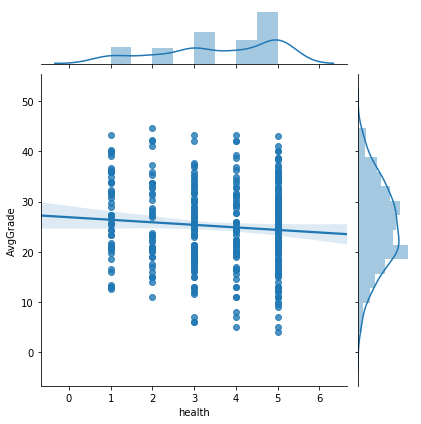

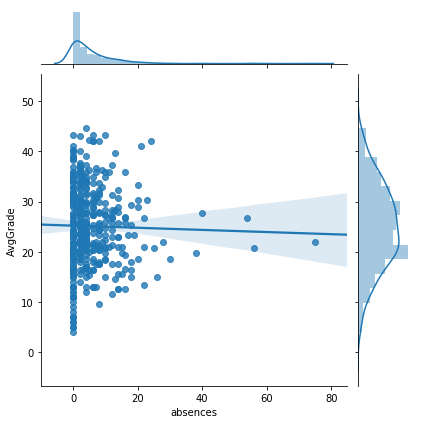

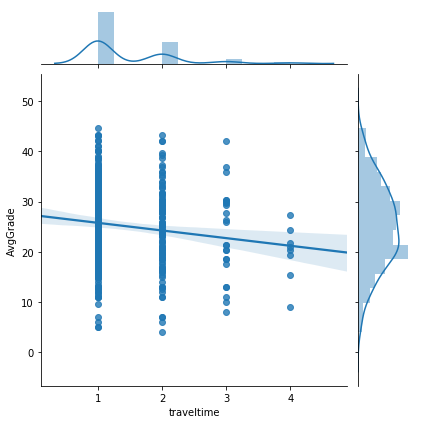

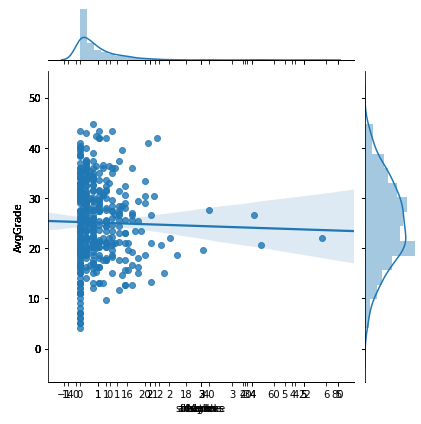

In [15]:
JG1 = sns.jointplot("age", "AvgGrade", data=studgrade, kind='reg')
JG2 = sns.jointplot("Medu", "AvgGrade", data=studgrade, kind='reg')


JG3 = sns.jointplot("studytime", "AvgGrade", data=studgrade, kind='reg')

JG4 = sns.jointplot("famrel", "AvgGrade", data=studgrade, kind='reg')

JG5 = sns.jointplot("freetime", "AvgGrade", data=studgrade, kind='reg')
JG6 = sns.jointplot("health", "AvgGrade", data=studgrade, kind='reg')
JG7 = sns.jointplot("absences", "AvgGrade", data=studgrade, kind='reg')
JG8 = sns.jointplot("traveltime", "AvgGrade", data=studgrade, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3,JG4,JG5,JG6,JG7]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

Check for outliers using Box Plot

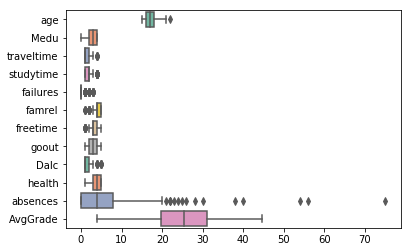

In [16]:
sns.boxplot(data=studgrade,orient="h", palette="Set2")

From the above boxplot we can say outliners are there and maximum present for absences.

Before proceeding for finding any further relation we need to do dummification of the data as many categoriacal variables are present in the data. Need to convert all the data in numeric form.

In [17]:
studgrade.head()

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,AvgGrade
0,GP,F,18,U,GT3,A,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,3,6,13.000000
1,GP,F,17,U,GT3,T,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,3,4,12.000000
2,GP,F,15,U,LE3,T,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,10,18.333333
3,GP,F,15,U,GT3,T,4,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,5,2,34.000000
4,GP,F,16,U,GT3,T,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,5,4,19.333333


In [18]:
school_dummies = pd.get_dummies(studgrade.school,prefix='school')                           # create three dummy variables using get_dummies
school_dummies.head()



,school_GP,school_MS
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [19]:
address_dummies = pd.get_dummies(studgrade.address,prefix='address')                           # create three dummy variables using get_dummies
address_dummies.head()

,address_R,address_U
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [20]:
famsize_dummies = pd.get_dummies(studgrade.famsize,prefix='famsize')                           # create three dummy variables using get_dummies
famsize_dummies.head()

,famsize_GT3,famsize_LE3
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [21]:
Pstatus_dummies = pd.get_dummies(studgrade.Pstatus,prefix='Pstatus')                           # create three dummy variables using get_dummies
Pstatus_dummies.head()

,Pstatus_A,Pstatus_T
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [22]:
sex_dummies = pd.get_dummies(studgrade.sex,prefix='sex')                           # create three dummy variables using get_dummies
sex_dummies.head()

,sex_F,sex_M
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


As for Mjob distinct value is 4 we will go for LabelEncoding in this case

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
studgrade["Mjob"]=le.fit_transform(studgrade["Mjob"])


Same doing for Fjob and guardian and reason

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
studgrade["Fjob"]=le.fit_transform(studgrade["Fjob"])

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
studgrade["guardian"]=le.fit_transform(studgrade["guardian"])

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
studgrade["reason"]=le.fit_transform(studgrade["reason"])

In [27]:
studgrade.head()

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,AvgGrade
0,GP,F,18,U,GT3,A,4,0,4,0,1,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,3,6,13.000000
1,GP,F,17,U,GT3,T,1,0,2,0,0,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,3,4,12.000000
2,GP,F,15,U,LE3,T,1,0,2,2,1,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,10,18.333333
3,GP,F,15,U,GT3,T,4,1,3,1,1,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,5,2,34.000000
4,GP,F,16,U,GT3,T,3,2,2,1,0,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,5,4,19.333333


In [28]:
data = pd.concat([studgrade, school_dummies,address_dummies,famsize_dummies,Pstatus_dummies,sex_dummies], axis=1)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,AvgGrade,school_GP,school_MS,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,sex_F,sex_M
0,GP,F,18,U,GT3,A,4,0,4,0,1,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,3,6,13.000000,1,0,0,1,1,0,1,0,1,0
1,GP,F,17,U,GT3,T,1,0,2,0,0,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,3,4,12.000000,1,0,0,1,1,0,0,1,1,0
2,GP,F,15,U,LE3,T,1,0,2,2,1,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,10,18.333333,1,0,0,1,0,1,0,1,1,0
3,GP,F,15,U,GT3,T,4,1,3,1,1,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,5,2,34.000000,1,0,0,1,1,0,0,1,1,0
4,GP,F,16,U,GT3,T,3,2,2,1,0,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,5,4,19.333333,1,0,0,1,1,0,0,1,1,0


Converting all yes and no to directly 1 and 0.yes=1 and no=0

In [29]:
data.schoolsup.replace(('yes', 'no'), (1, 0), inplace=True)
data.famsup.replace(('yes', 'no'), (1, 0), inplace=True)
data.paid.replace(('yes', 'no'), (1, 0), inplace=True)
data.activities.replace(('yes', 'no'), (1, 0), inplace=True)
data.nursery.replace(('yes', 'no'), (1, 0), inplace=True)
data.higher.replace(('yes', 'no'), (1, 0), inplace=True)
data.internet.replace(('yes', 'no'), (1, 0), inplace=True)
data.romantic.replace(('yes', 'no'), (1, 0), inplace=True)

In [30]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,AvgGrade,school_GP,school_MS,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,sex_F,sex_M
0,GP,F,18,U,GT3,A,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,3,6,13.000000,1,0,0,1,1,0,1,0,1,0
1,GP,F,17,U,GT3,T,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,3,4,12.000000,1,0,0,1,1,0,0,1,1,0
2,GP,F,15,U,LE3,T,1,0,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,10,18.333333,1,0,0,1,0,1,0,1,1,0
3,GP,F,15,U,GT3,T,4,1,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,5,2,34.000000,1,0,0,1,1,0,0,1,1,0
4,GP,F,16,U,GT3,T,3,2,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,5,4,19.333333,1,0,0,1,1,0,0,1,1,0


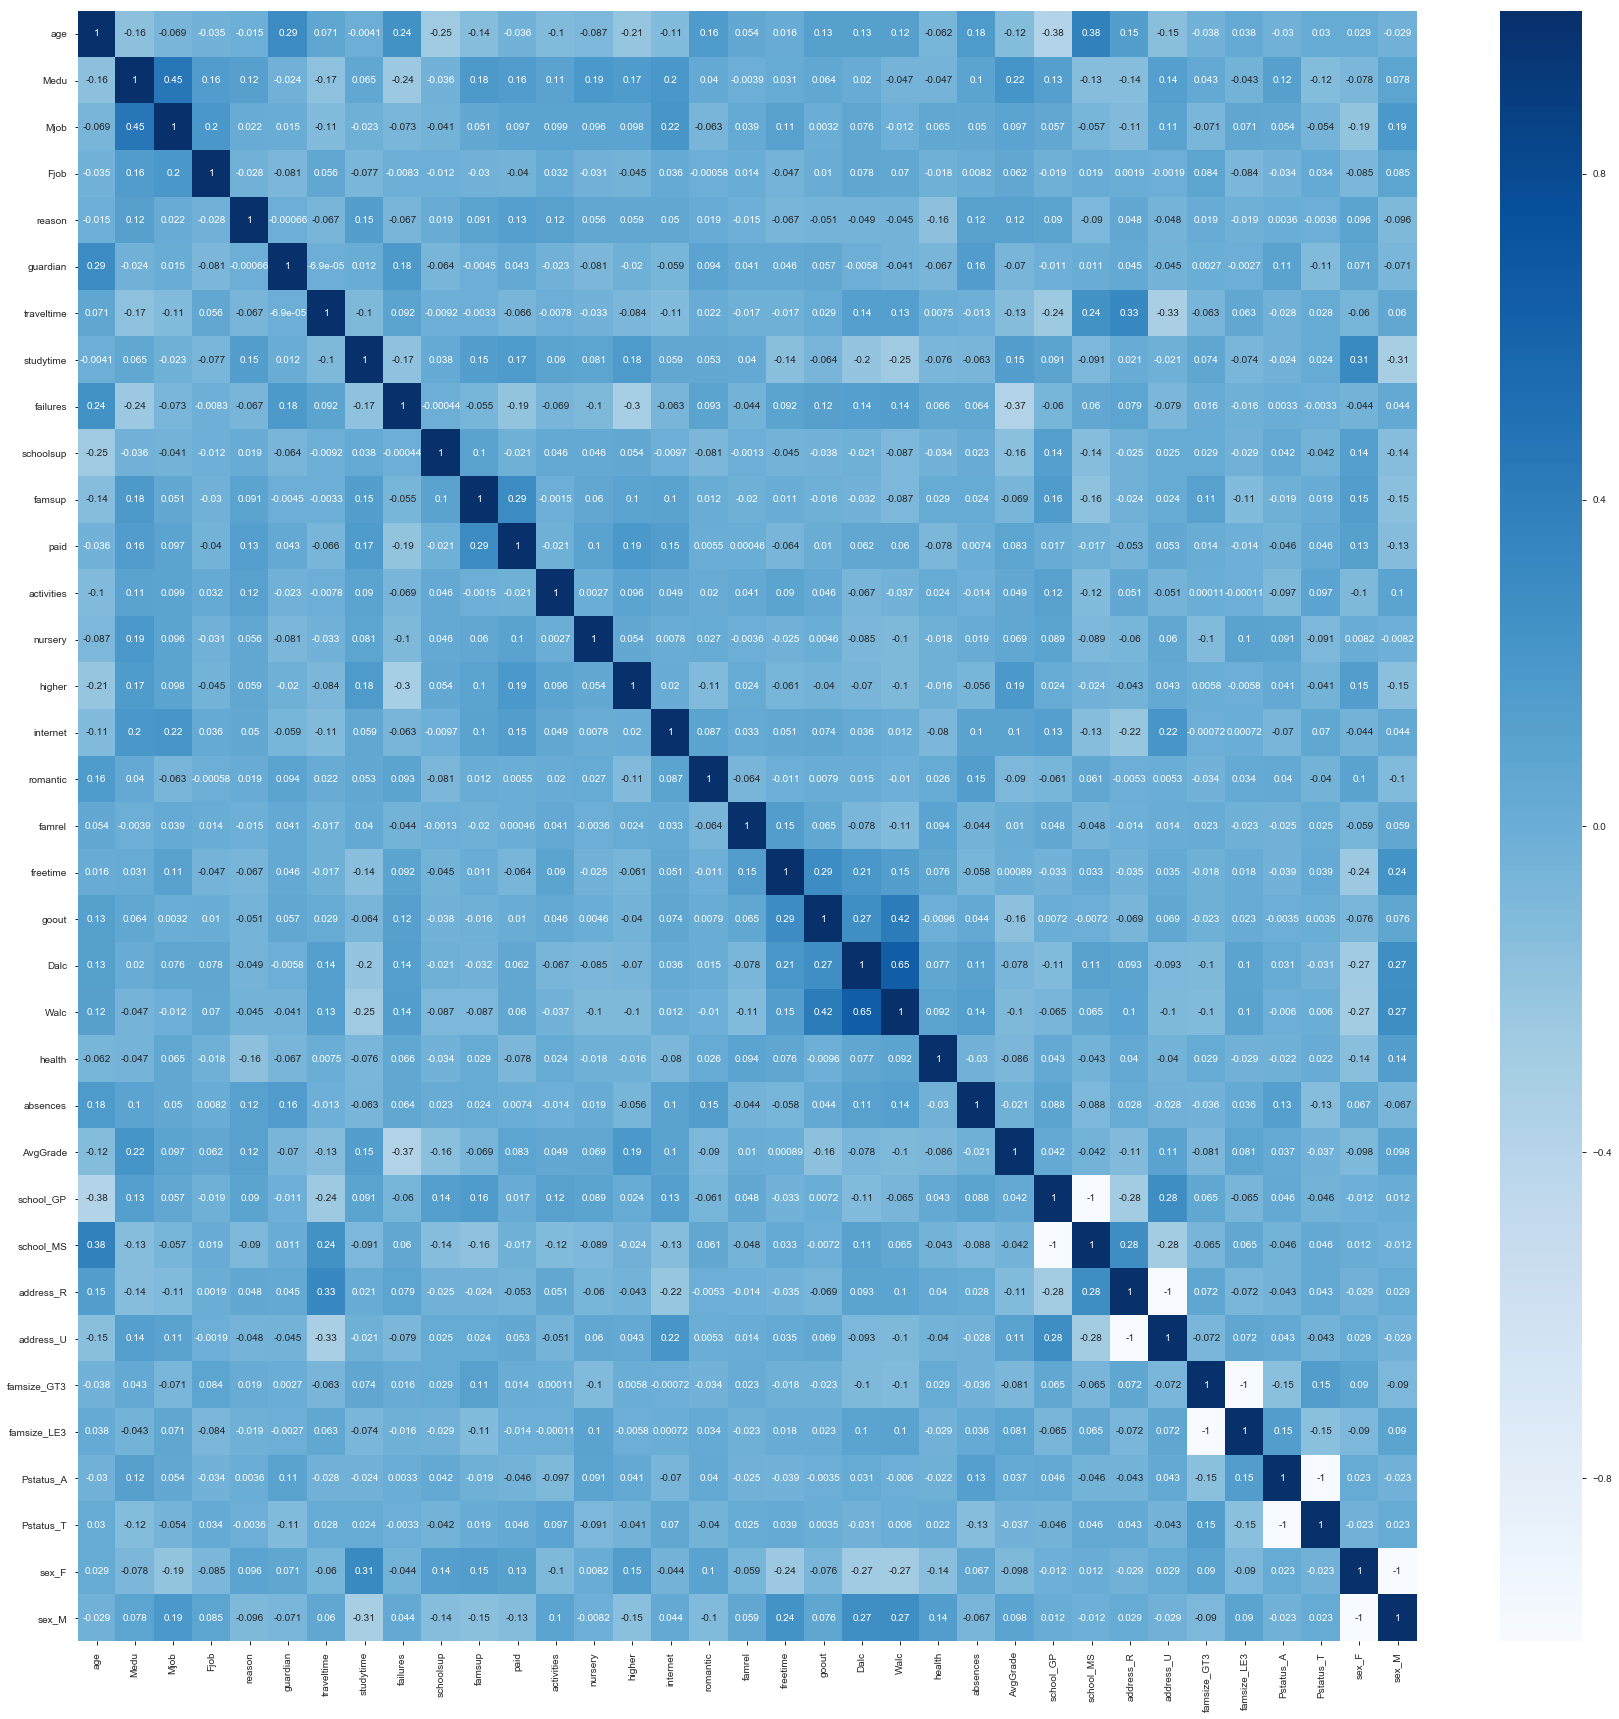

In [149]:
plt.figure(figsize=(30, 30))

sns.heatmap(data.corr(), annot=True,cmap='Blues' );

As we can see there is corelation between Medu and MJob.So dropping MJob column.

In [31]:
data.drop(['Mjob'],axis=1,inplace=True)

dropping adrress as corelation is there betweeen school and address.

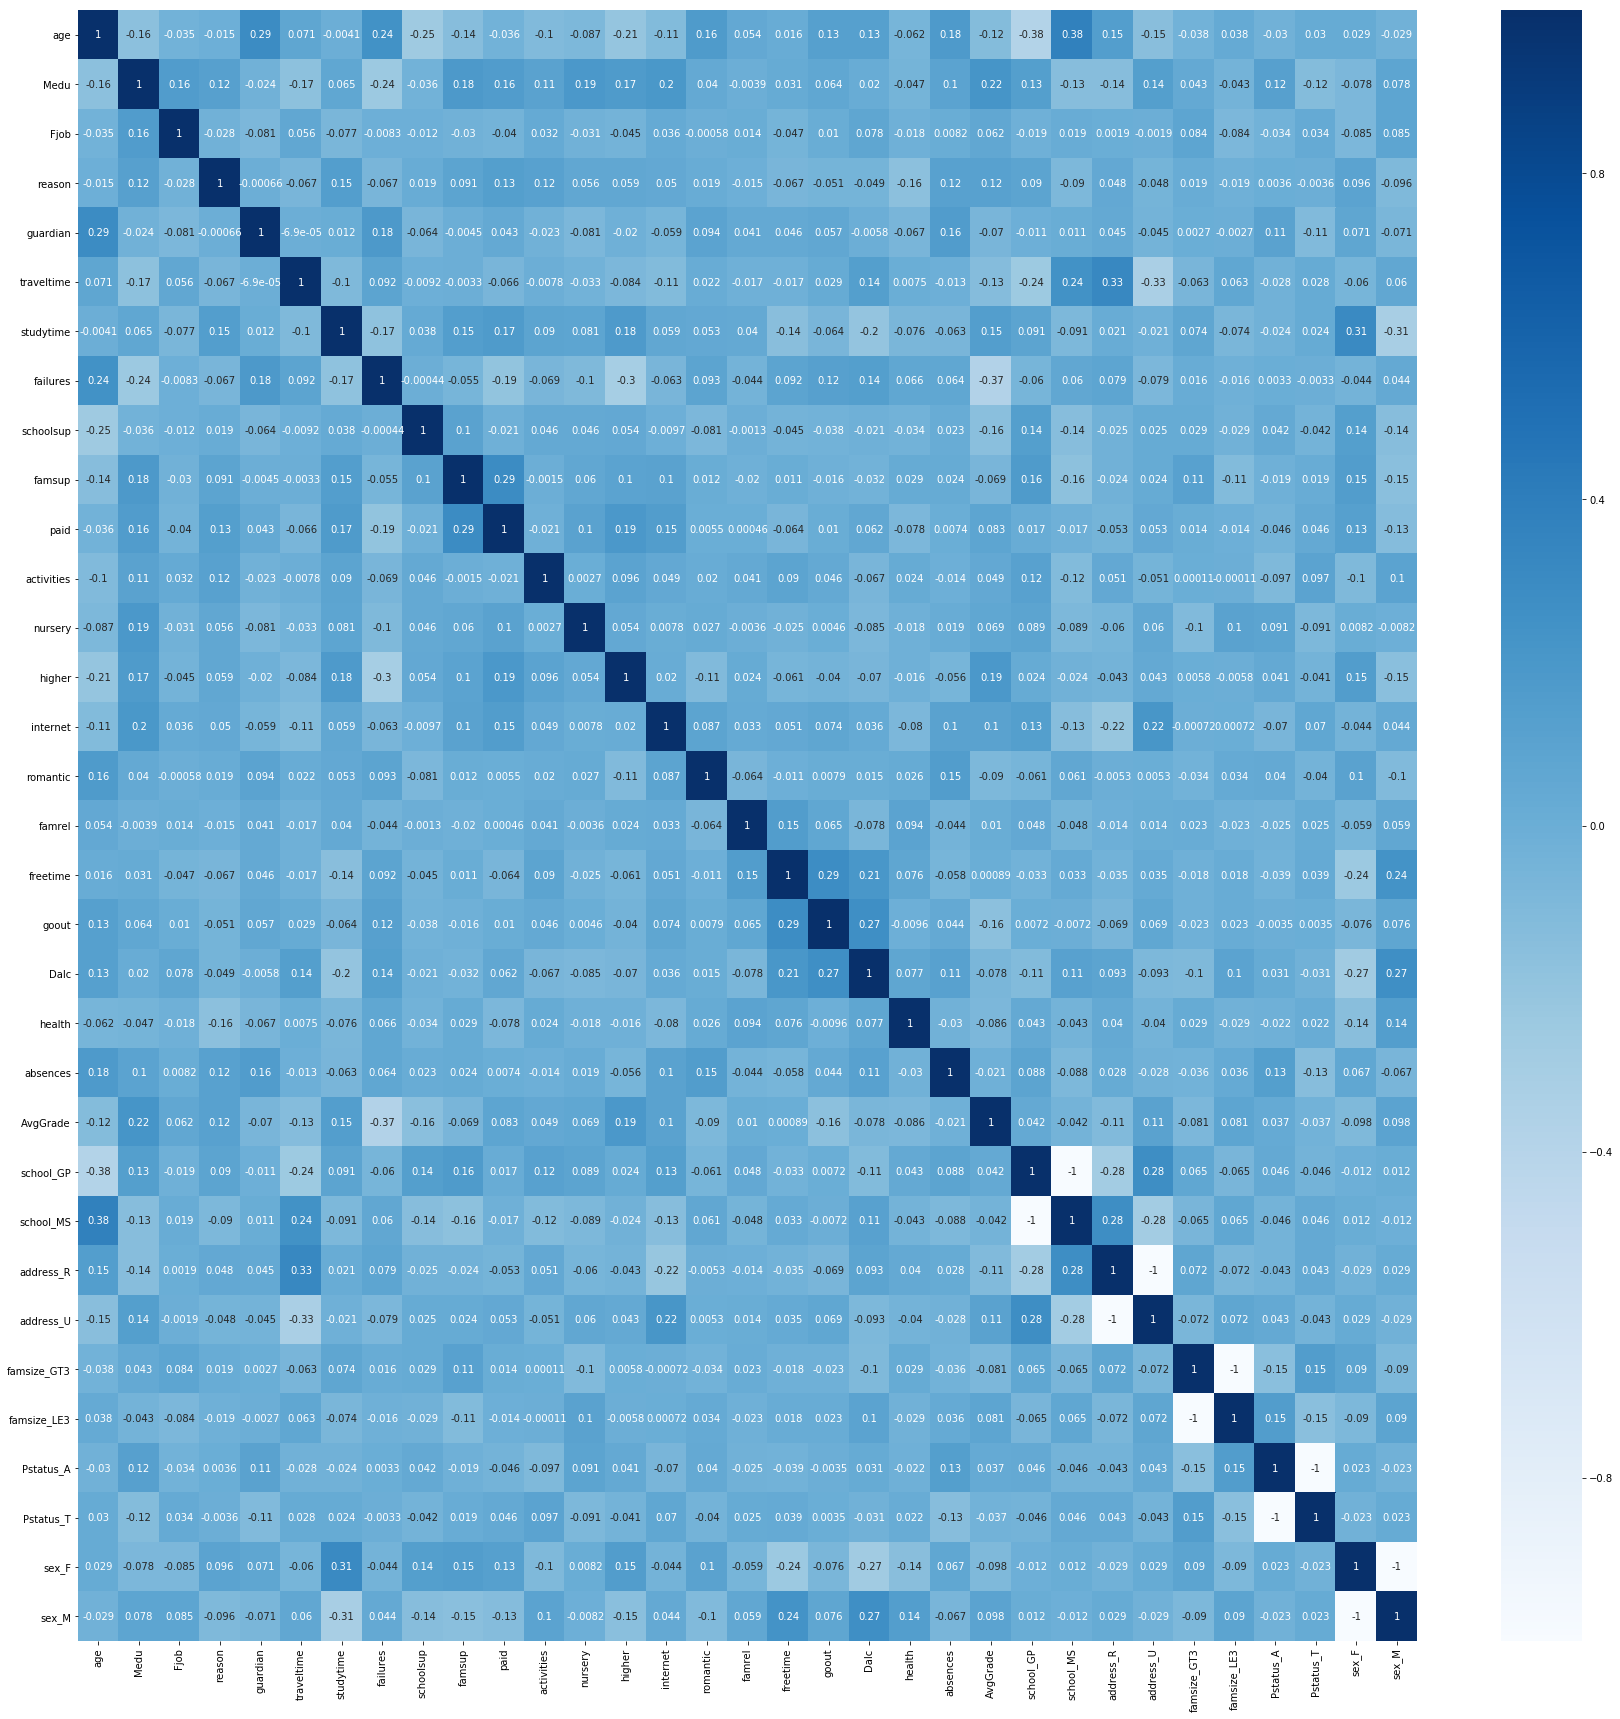

In [32]:
plt.figure(figsize=(30, 30))

sns.heatmap(data.corr(), annot=True,cmap='Blues' );

dropping sex_M,Pstatus_T,famsize_LE3,address_U,school_MS as presence of only one categorical variable respectively will serve the purpose

In [33]:
data.drop(['sex_M','Pstatus_T','famsize_LE3','address_U','school_MS'],axis=1,inplace=True)

In [34]:
data.drop(['school_GP'],axis=1,inplace=True)

Check for outliners now

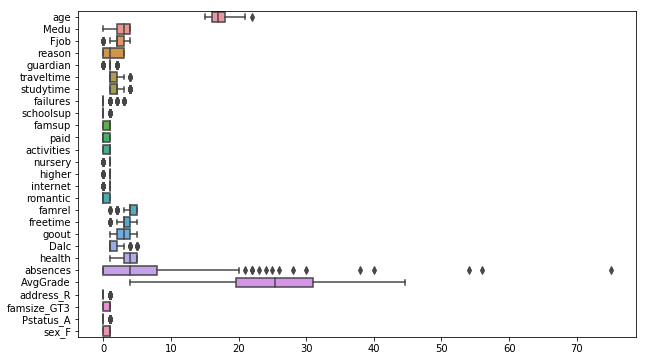

In [35]:
plt.figure(figsize=(10, 6))

sns.boxplot(data=data,orient="h")

As already dummification and labelencoding has been done for all the columns I am dropping the columns which contains string or object values.

In [36]:
data.dtypes

school          object
sex             object
age              int64
address         object
famsize         object
Pstatus         object
Medu             int64
Fjob             int32
reason           int32
guardian         int32
traveltime       int64
studytime        int64
failures         int64
schoolsup        int64
famsup           int64
paid             int64
activities       int64
nursery          int64
higher           int64
internet         int64
romantic         int64
famrel           int64
freetime         int64
goout            int64
Dalc             int64
health           int64
absences         int64
AvgGrade       float64
address_R        uint8
famsize_GT3      uint8
Pstatus_A        uint8
sex_F            uint8
dtype: object

In [37]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,AvgGrade,address_R,famsize_GT3,Pstatus_A,sex_F
0,GP,F,18,U,GT3,A,4,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,3,6,13.000000,0,1,1,1
1,GP,F,17,U,GT3,T,1,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,3,4,12.000000,0,1,0,1
2,GP,F,15,U,LE3,T,1,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,10,18.333333,0,0,0,1
3,GP,F,15,U,GT3,T,4,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,5,2,34.000000,0,1,0,1
4,GP,F,16,U,GT3,T,3,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,5,4,19.333333,0,1,0,1


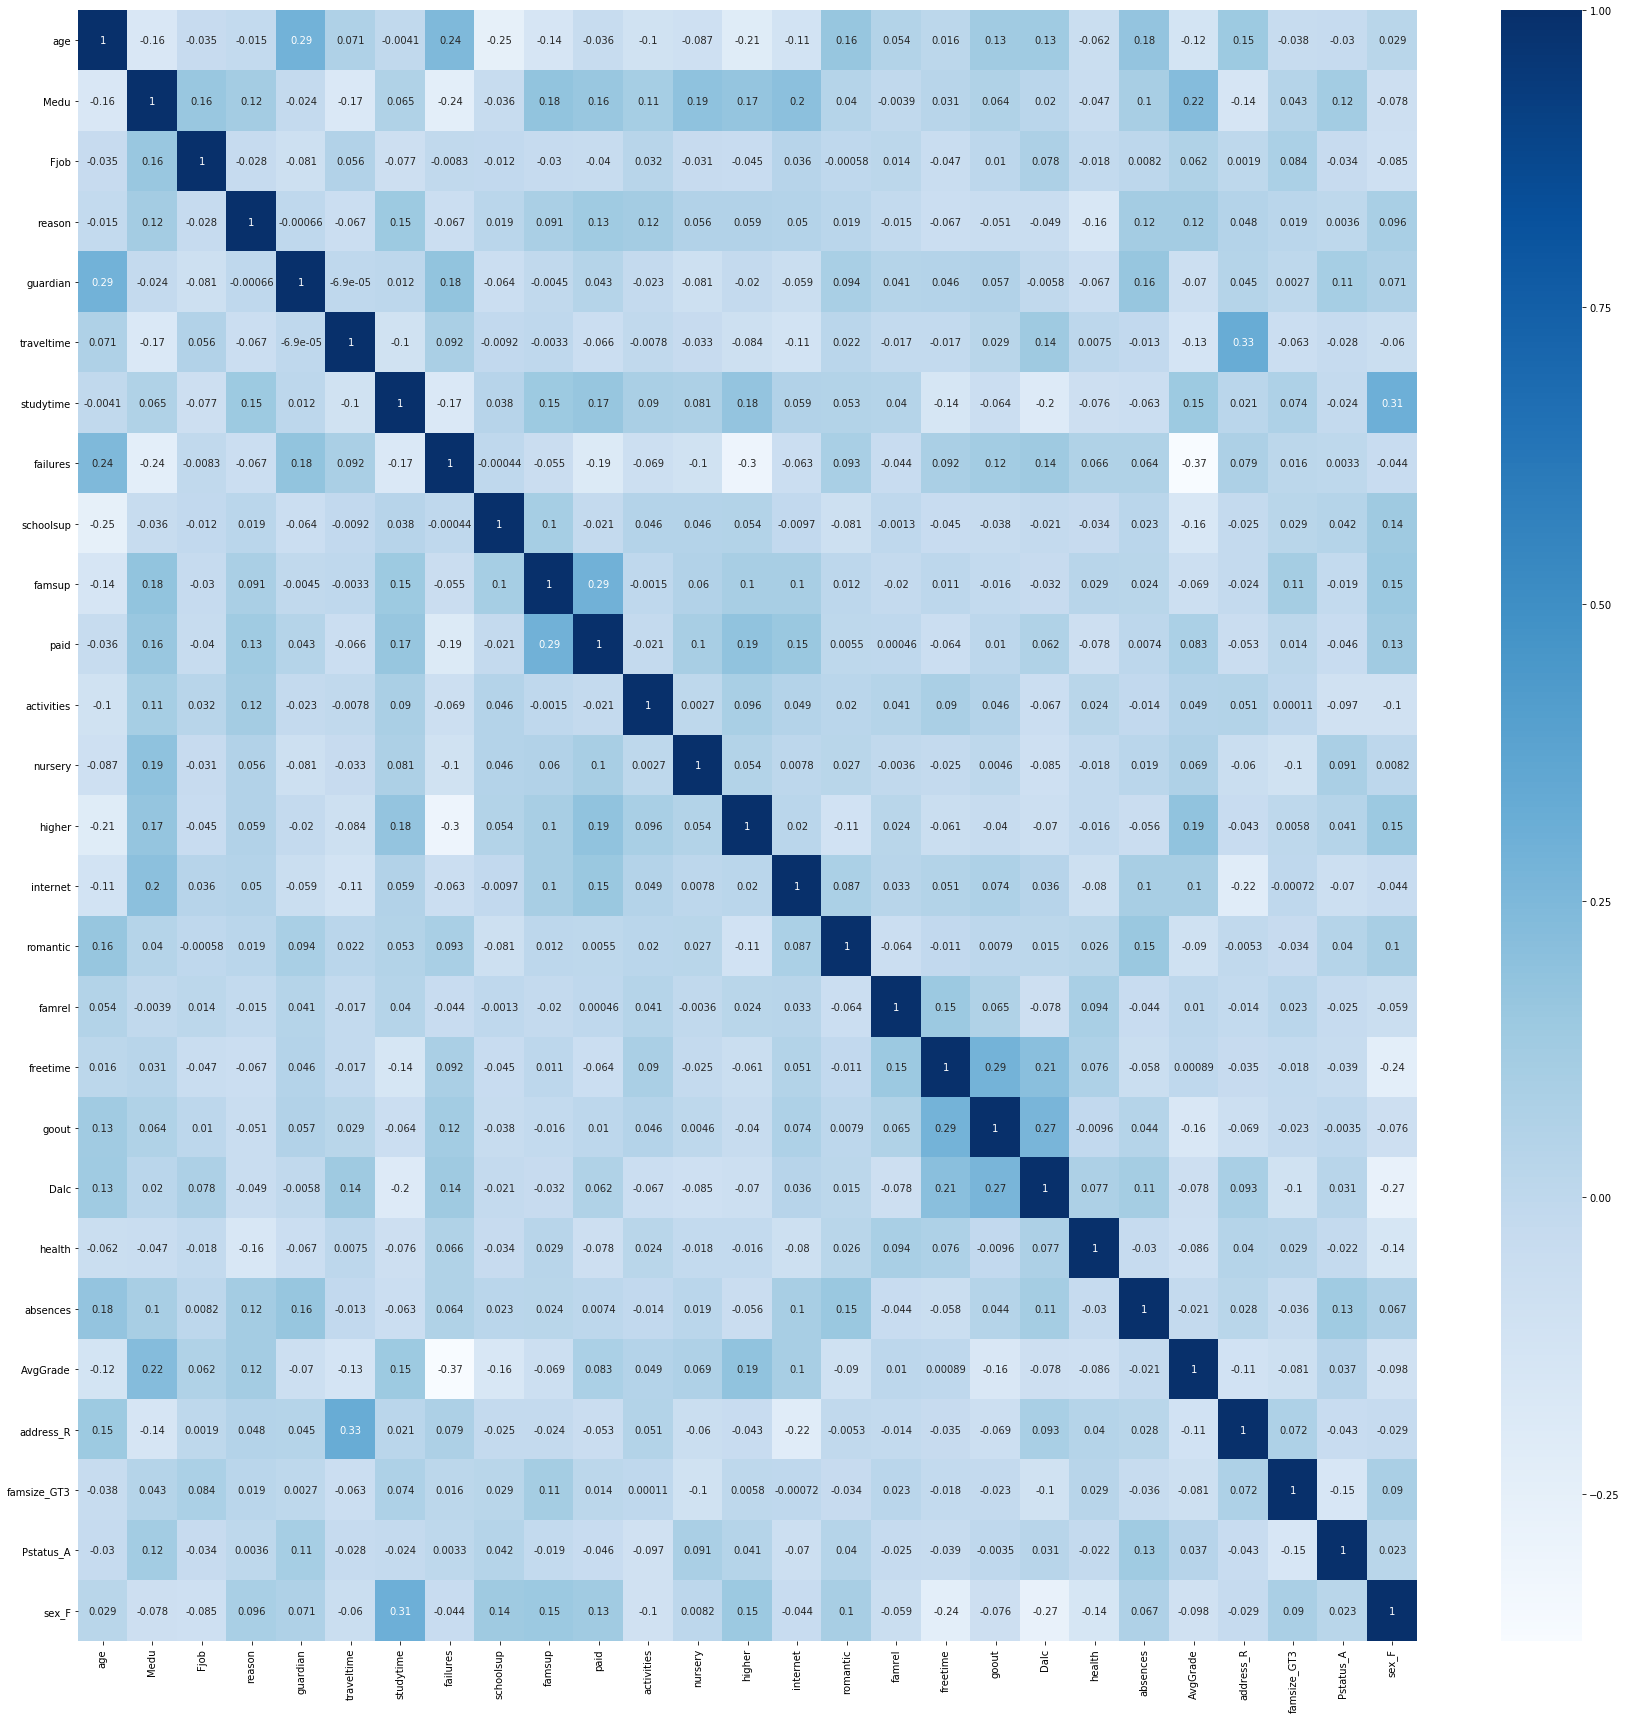

In [38]:
plt.figure(figsize=(30, 30))

sns.heatmap(data.corr(), annot=True,cmap='Blues' );

In [39]:
data.drop(['school','sex','address','famsize','Pstatus'],axis=1,inplace=True) #dropping the object columns

Calculate the Inter quantile range and then drop off outliers for quantile values outside 5 to 95 range.

In [40]:
Q1 = data.quantile(0.05)
Q3 = data.quantile(0.95)
Q_diff = Q3 - Q1

data_out = data[~((data < (Q1 - Q_diff))|(data > (Q3 + Q_diff))).any(axis=1)]
data_out.reset_index()

,index,age,Medu,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,health,absences,AvgGrade,address_R,famsize_GT3,Pstatus_A,sex_F
0,0,18,4,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,3,6,13.000000,0,1,1,1
1,1,17,1,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,3,4,12.000000,0,1,0,1
2,2,15,1,2,2,1,1,2,3,1,0,1,0,1,1,1,0,4,3,2,2,3,10,18.333333,0,0,0,1
3,3,15,4,3,1,1,1,3,0,0,1,1,1,1,1,1,1,3,2,2,1,5,2,34.000000,0,1,0,1
4,4,16,3,2,1,0,1,2,0,0,1,1,0,1,1,0,0,4,3,2,1,5,4,19.333333,0,1,0,1
5,5,16,4,2,3,1,1,2,0,0,1,1,1,1,1,1,0,5,4,2,1,5,10,35.000000,0,0,0,0
6,6,16,2,2,1,1,1,2,0,0,0,0,0,1,1,1,0,4,4,4,1,3,0,27.666667,0,0,0,0
7,7,17,4,4,1,1,2,2,0,1,1,0,0,1,1,0,0,4,1,4,1,1,6,13.000000,0,1,1,1
8,8,15,3,2,1,1,1,2,0,0,1,1,0,1,1,1,0,4,2,2,1,1,0,40.333333,0,0,1,0
9,9,15,3,2,1,1,1,2,0,0,1,1,1,1,1,1,0,5,5,1,1,5,0,34.000000,0,1,0,0


Generating the profiler output again to check the contious columns.

In [41]:
data_out.columns

Index(['age', 'Medu', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'health', 'absences', 'AvgGrade', 'address_R', 'famsize_GT3',
       'Pstatus_A', 'sex_F'],
      dtype='object')

In [162]:
import pandas_profiling                                                      # Get a quick overview for all the variables using pandas_profiling                                         
profile = pandas_profiling.ProfileReport(data_out)
profile.to_file(output_file="studgradeoutputfile1.html")                              # HTML file will be downloaded to your workspace

In [42]:
datacont=data_out[['absences','age','famrel','freetime','AvgGrade','health','Medu','Dalc','Fjob','goout']]
datacont.reset_index()

,index,absences,age,famrel,freetime,AvgGrade,health,Medu,Dalc,Fjob,goout
0,0,6,18,4,3,13.000000,3,4,1,4,4
1,1,4,17,5,3,12.000000,3,1,1,2,3
2,2,10,15,4,3,18.333333,3,1,2,2,2
3,3,2,15,3,2,34.000000,5,4,1,3,2
4,4,4,16,4,3,19.333333,5,3,1,2,2
5,5,10,16,5,4,35.000000,5,4,1,2,2
6,6,0,16,4,4,27.666667,3,2,1,2,4
7,7,6,17,4,1,13.000000,1,4,1,4,4
8,8,0,15,4,2,40.333333,1,3,1,2,2
9,9,0,15,5,5,34.000000,5,3,1,2,1


In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(datacont)
data1 = scaler.transform(datacont)

In [44]:
datastnd = pd.DataFrame(data1)
datastnd

,0,1,2,3,4,5,6,7,8,9
0,0.144907,1.11398,0.059659,-0.230820,-1.534362,-0.397272,1.114346,-0.525319,1.995310,0.825444
1,-0.199711,0.30520,1.166338,-0.230820,-1.657407,-0.397272,-1.647942,-0.525319,-0.310796,-0.091441
2,0.834143,-1.31236,0.059659,-0.230820,-0.878121,-0.397272,-1.647942,0.601232,-0.310796,-1.008327
3,-0.544329,-1.31236,-1.047020,-1.238280,1.049588,1.040659,1.114346,-0.525319,0.842257,-1.008327
4,-0.199711,-0.50358,0.059659,-0.230820,-0.755075,1.040659,0.193584,-0.525319,-0.310796,-1.008327
5,0.834143,-0.50358,1.166338,0.776641,1.172633,1.040659,1.114346,-0.525319,-0.310796,-1.008327
6,-0.888948,-0.50358,0.059659,0.776641,0.270302,-0.397272,-0.727179,-0.525319,-0.310796,0.825444
7,0.144907,0.30520,0.059659,-2.245741,-1.534362,-1.835202,1.114346,-0.525319,1.995310,0.825444
8,-0.888948,-1.31236,0.059659,-1.238280,1.828874,-1.835202,0.193584,-0.525319,-0.310796,-1.008327
9,-0.888948,-1.31236,1.166338,1.784101,1.049588,1.040659,0.193584,-0.525319,-0.310796,-1.925212


In [45]:
datastnd.columns = ['absences','age','famrel','freetime','AvgGrade','health','Medu','Dalc','Fjob','goout']
datastnd

,absences,age,famrel,freetime,AvgGrade,health,Medu,Dalc,Fjob,goout
0,0.144907,1.11398,0.059659,-0.230820,-1.534362,-0.397272,1.114346,-0.525319,1.995310,0.825444
1,-0.199711,0.30520,1.166338,-0.230820,-1.657407,-0.397272,-1.647942,-0.525319,-0.310796,-0.091441
2,0.834143,-1.31236,0.059659,-0.230820,-0.878121,-0.397272,-1.647942,0.601232,-0.310796,-1.008327
3,-0.544329,-1.31236,-1.047020,-1.238280,1.049588,1.040659,1.114346,-0.525319,0.842257,-1.008327
4,-0.199711,-0.50358,0.059659,-0.230820,-0.755075,1.040659,0.193584,-0.525319,-0.310796,-1.008327
5,0.834143,-0.50358,1.166338,0.776641,1.172633,1.040659,1.114346,-0.525319,-0.310796,-1.008327
6,-0.888948,-0.50358,0.059659,0.776641,0.270302,-0.397272,-0.727179,-0.525319,-0.310796,0.825444
7,0.144907,0.30520,0.059659,-2.245741,-1.534362,-1.835202,1.114346,-0.525319,1.995310,0.825444
8,-0.888948,-1.31236,0.059659,-1.238280,1.828874,-1.835202,0.193584,-0.525319,-0.310796,-1.008327
9,-0.888948,-1.31236,1.166338,1.784101,1.049588,1.040659,0.193584,-0.525319,-0.310796,-1.925212


now drop the contious columns from data_out and then add the newly standarized column values in that dataset.

In [46]:
data_out1 = data_out.drop(['absences','age','famrel','freetime','AvgGrade','health','Medu','Dalc','Fjob','goout'],axis=1,inplace=False).reset_index()

In [47]:
data_out1

,index,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,address_R,famsize_GT3,Pstatus_A,sex_F
0,0,0,1,2,2,0,1,0,0,0,1,1,0,0,0,1,1,1
1,1,0,0,1,2,0,0,1,0,0,0,1,1,0,0,1,0,1
2,2,2,1,1,2,3,1,0,1,0,1,1,1,0,0,0,0,1
3,3,1,1,1,3,0,0,1,1,1,1,1,1,1,0,1,0,1
4,4,1,0,1,2,0,0,1,1,0,1,1,0,0,0,1,0,1
5,5,3,1,1,2,0,0,1,1,1,1,1,1,0,0,0,0,0
6,6,1,1,1,2,0,0,0,0,0,1,1,1,0,0,0,0,0
7,7,1,1,2,2,0,1,1,0,0,1,1,0,0,0,1,1,1
8,8,1,1,1,2,0,0,1,1,0,1,1,1,0,0,0,1,0
9,9,1,1,1,2,0,0,1,1,1,1,1,1,0,0,1,0,0


In [48]:
#data_out[['absences','age','famrel','freetime','G3','health','Medu']]=datastnd[['absences','age','famrel','freetime','G3','health','Medu']]

Formatteddata = pd.concat([datastnd, data_out1], axis=1)
Formatteddata

,absences,age,famrel,freetime,AvgGrade,health,Medu,Dalc,Fjob,goout,index,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,address_R,famsize_GT3,Pstatus_A,sex_F
0,0.144907,1.11398,0.059659,-0.230820,-1.534362,-0.397272,1.114346,-0.525319,1.995310,0.825444,0,0,1,2,2,0,1,0,0,0,1,1,0,0,0,1,1,1
1,-0.199711,0.30520,1.166338,-0.230820,-1.657407,-0.397272,-1.647942,-0.525319,-0.310796,-0.091441,1,0,0,1,2,0,0,1,0,0,0,1,1,0,0,1,0,1
2,0.834143,-1.31236,0.059659,-0.230820,-0.878121,-0.397272,-1.647942,0.601232,-0.310796,-1.008327,2,2,1,1,2,3,1,0,1,0,1,1,1,0,0,0,0,1
3,-0.544329,-1.31236,-1.047020,-1.238280,1.049588,1.040659,1.114346,-0.525319,0.842257,-1.008327,3,1,1,1,3,0,0,1,1,1,1,1,1,1,0,1,0,1
4,-0.199711,-0.50358,0.059659,-0.230820,-0.755075,1.040659,0.193584,-0.525319,-0.310796,-1.008327,4,1,0,1,2,0,0,1,1,0,1,1,0,0,0,1,0,1
5,0.834143,-0.50358,1.166338,0.776641,1.172633,1.040659,1.114346,-0.525319,-0.310796,-1.008327,5,3,1,1,2,0,0,1,1,1,1,1,1,0,0,0,0,0
6,-0.888948,-0.50358,0.059659,0.776641,0.270302,-0.397272,-0.727179,-0.525319,-0.310796,0.825444,6,1,1,1,2,0,0,0,0,0,1,1,1,0,0,0,0,0
7,0.144907,0.30520,0.059659,-2.245741,-1.534362,-1.835202,1.114346,-0.525319,1.995310,0.825444,7,1,1,2,2,0,1,1,0,0,1,1,0,0,0,1,1,1
8,-0.888948,-1.31236,0.059659,-1.238280,1.828874,-1.835202,0.193584,-0.525319,-0.310796,-1.008327,8,1,1,1,2,0,0,1,1,0,1,1,1,0,0,0,1,0
9,-0.888948,-1.31236,1.166338,1.784101,1.049588,1.040659,0.193584,-0.525319,-0.310796,-1.925212,9,1,1,1,2,0,0,1,1,1,1,1,1,0,0,1,0,0


Preparing X and y using pandas

In [49]:
Formatteddata.columns

Index(['absences', 'age', 'famrel', 'freetime', 'AvgGrade', 'health', 'Medu',
       'Dalc', 'Fjob', 'goout', 'index', 'reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'address_R', 'famsize_GT3',
       'Pstatus_A', 'sex_F'],
      dtype='object')

In [51]:
#feature_cols.clear()
feature_cols=['absences', 'age', 'famrel', 'freetime','health', 'Medu',
       'Dalc', 'Fjob', 'goout','reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'address_R', 'famsize_GT3',
       'Pstatus_A', 'sex_F']
# create a Python list of feature names
X = Formatteddata[feature_cols]                                     # use the list to select a subset of the original DataFrame-+
X.head()

,absences,age,famrel,freetime,health,Medu,Dalc,Fjob,goout,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,address_R,famsize_GT3,Pstatus_A,sex_F
0,0.144907,1.11398,0.059659,-0.23082,-0.397272,1.114346,-0.525319,1.995310,0.825444,0,1,2,2,0,1,0,0,0,1,1,0,0,0,1,1,1
1,-0.199711,0.30520,1.166338,-0.23082,-0.397272,-1.647942,-0.525319,-0.310796,-0.091441,0,0,1,2,0,0,1,0,0,0,1,1,0,0,1,0,1
2,0.834143,-1.31236,0.059659,-0.23082,-0.397272,-1.647942,0.601232,-0.310796,-1.008327,2,1,1,2,3,1,0,1,0,1,1,1,0,0,0,0,1
3,-0.544329,-1.31236,-1.047020,-1.23828,1.040659,1.114346,-0.525319,0.842257,-1.008327,1,1,1,3,0,0,1,1,1,1,1,1,1,0,1,0,1
4,-0.199711,-0.50358,0.059659,-0.23082,1.040659,0.193584,-0.525319,-0.310796,-1.008327,1,0,1,2,0,0,1,1,0,1,1,0,0,0,1,0,1


In [52]:
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(371, 26)


In [53]:
y = Formatteddata.AvgGrade
y.head()

0   -1.534362
1   -1.657407
2   -0.878121
3    1.049588
4   -0.755075
Name: AvgGrade, dtype: float64

In [54]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(371,)


Splitting X and y into training and test datasets

In [55]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.30, random_state=0)

In [56]:
X_train, X_test, y_train, y_test=split(X,y)
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (259, 26)
y_train shape:  (259,)

Test cases as below
X_test shape:  (112, 26)
y_test shape:  (112,)


We will run Linear Regression Model without GridSearcCV

In [57]:
def linear_reg( X, y, gridsearch = False):
    
    X_train, X_test, y_train, y_test = split(X,y)
    
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    
    if not(gridsearch):
        linreg.fit(X_train, y_train) 

    else:
        from sklearn.model_selection import GridSearchCV
        parameters = {'normalize':[True,False], 'copy_X':[True, False]}
        linreg = GridSearchCV(linreg,parameters, cv = 10,refit = True)
        linreg.fit(X_train, y_train)                                                           # fit the model to the training data (learn the coefficients)
        print("Mean cross-validated score of the best_estimator : ", linreg.best_score_)  
        
        y_pred_test = linreg.predict(X_test)                                                   # make predictions on the testing set

        RMSE_test = (metrics.mean_squared_error(y_test, y_pred_test))                          # compute the RMSE of our predictions
        print('RMSE for the test set is {}'.format(RMSE_test))

    return linreg

In [58]:
X = Formatteddata[feature_cols]  
y = Formatteddata.AvgGrade
linreg = linear_reg(X,y)  #by dafault passing false so it will take not gridsearch portion

linreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Interpreting Model Coefficients

In [59]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 0.027949704637808968
Coefficients: [-3.50416535e-02 -3.31961630e-02  4.42908897e-03  4.85207995e-02
 -7.35453897e-02  7.15633921e-02 -9.44300521e-04  1.98645592e-02
 -1.30683427e-01  7.94384326e-02  4.59979472e-02 -8.73307952e-02
  1.63413800e-01 -3.60799363e-01 -4.16354477e-01 -2.31288814e-01
 -7.38281574e-04 -6.07150354e-02  6.52689651e-03  5.55111512e-17
  2.04345493e-01 -4.15735537e-02 -1.40431260e-01 -1.32495941e-01
  2.47934579e-01 -1.87311503e-01]


 zipping the features to pair the feature names with the coefficients

In [60]:
feature_cols.insert(0,'Intercept')
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)   

In [61]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 0.027949704637808968
absences -0.035041653508167105
age -0.03319616296127453
famrel 0.004429088967017304
freetime 0.04852079954378008
health -0.07354538970872306
Medu 0.07156339213840442
Dalc -0.0009443005206241711
Fjob 0.019864559201596556
goout -0.1306834274362413
reason 0.07943843258736114
guardian 0.045997947178249406
traveltime -0.08733079520290894
studytime 0.16341379990651314
failures -0.3607993632101875
schoolsup -0.4163544767603149
famsup -0.2312888140782796
paid -0.0007382815739213114
activities -0.060715035354535485
nursery 0.006526896508099662
higher 5.551115123125783e-17
internet 0.20434549293133925
romantic -0.04157355369001621
address_R -0.14043125988079572
famsize_GT3 -0.13249594110543247
Pstatus_A 0.24793457876909616
sex_F -0.1873115027674266


so the expected linear equation is:

y = 0.027949704637808968 -0.035041653508167105 * absences -0.03319616296127453 * age + 0.004429088967017304 * famrel+........

Model Evaluation using metrics.

In [62]:
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test)


In [63]:
from sklearn import metrics

MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_train
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
MAE_test

0.6274722105886182

In [64]:

print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.7306114642896886
MAE for test set is 0.6274722105886182


In [65]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [66]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.8148670684882027
MSE for test set is 0.6359687341414174


In [67]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [68]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.9026998773059641
RMSE for test set is 0.7974764787386631


In [69]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.21873736641749286 0.13118207127462578


In [70]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.2937711758320586 0.07774824138068814


In [71]:
feature_cols.clear()

Model evalution with GridSearch

In [72]:
feature_cols=['absences', 'age', 'famrel', 'freetime','health', 'Medu',
       'Dalc', 'Fjob', 'goout','reason', 'guardian', 'traveltime',
       'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'address_R',
       'famsize_GT3', 'Pstatus_A', 'sex_F']


# create a Python list of feature names
X = Formatteddata[feature_cols]                                     # use the list to select a subset of the original DataFrame-+
X.head()

,absences,age,famrel,freetime,health,Medu,Dalc,Fjob,goout,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,address_R,famsize_GT3,Pstatus_A,sex_F
0,0.144907,1.11398,0.059659,-0.23082,-0.397272,1.114346,-0.525319,1.995310,0.825444,0,1,2,2,0,1,0,0,0,1,1,0,0,0,1,1,1
1,-0.199711,0.30520,1.166338,-0.23082,-0.397272,-1.647942,-0.525319,-0.310796,-0.091441,0,0,1,2,0,0,1,0,0,0,1,1,0,0,1,0,1
2,0.834143,-1.31236,0.059659,-0.23082,-0.397272,-1.647942,0.601232,-0.310796,-1.008327,2,1,1,2,3,1,0,1,0,1,1,1,0,0,0,0,1
3,-0.544329,-1.31236,-1.047020,-1.23828,1.040659,1.114346,-0.525319,0.842257,-1.008327,1,1,1,3,0,0,1,1,1,1,1,1,1,0,1,0,1
4,-0.199711,-0.50358,0.059659,-0.23082,1.040659,0.193584,-0.525319,-0.310796,-1.008327,1,0,1,2,0,0,1,1,0,1,1,0,0,0,1,0,1


In [73]:
y = Formatteddata.AvgGrade
y.head()

0   -1.534362
1   -1.657407
2   -0.878121
3    1.049588
4   -0.755075
Name: AvgGrade, dtype: float64

In [74]:
from sklearn.model_selection import train_test_split

def split(X,y):
    return train_test_split(X, y, test_size=0.20, random_state=23)

In [75]:
X = Formatteddata[feature_cols]  
y = Formatteddata.AvgGrade
linreg = linear_reg(X,y,True)  

linreg

Mean cross-validated score of the best_estimator :  0.05556264794097522
RMSE for the test set is 0.7773831803809607


E:\AnacondaInstall\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'normalize': [True, False], 'copy_X': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [76]:
print('Intercept:',linreg.best_estimator_.intercept_)          # print the intercept 
print('Coefficients:',linreg.best_estimator_.coef_)

Intercept: 0.0929717304681147
Coefficients: [ 1.45499111e-02 -5.13036015e-02  2.48801241e-02  7.62555429e-02
 -7.84650316e-02  1.10456547e-01  2.68259191e-03  6.37467590e-02
 -1.67257308e-01  5.73156569e-02 -3.79977971e-02 -1.29968422e-01
  1.32567970e-01 -3.54855476e-01 -6.13553994e-01 -2.08029454e-01
 -9.65565268e-03  3.08683254e-02  7.82648368e-02  4.44089210e-16
  1.86563970e-01 -9.42295925e-02 -9.06823036e-02  9.84605737e-03
  1.22942665e-01 -2.63811257e-01]


In [77]:
feature_cols.insert(0,'Intercept')
coef = linreg.best_estimator_.coef_.tolist()            
coef.insert(0, linreg.best_estimator_.intercept_)       

In [78]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 0.0929717304681147
absences 0.014549911087288243
age -0.051303601549978206
famrel 0.024880124057382016
freetime 0.07625554292413084
health -0.07846503156953694
Medu 0.11045654739448803
Dalc 0.002682591910781575
Fjob 0.0637467590010585
goout -0.16725730819358484
reason 0.05731565687614994
guardian -0.03799779707455278
traveltime -0.12996842224490626
studytime 0.13256797012831975
failures -0.3548554755552238
schoolsup -0.6135539944900832
famsup -0.20802945445174675
paid -0.009655652680355066
activities 0.030868325354120686
nursery 0.07826483675532753
higher 4.440892098500626e-16
internet 0.18656397002979977
romantic -0.09422959249508399
address_R -0.09068230356508852
famsize_GT3 0.009846057365263878
Pstatus_A 0.12294266482421382
sex_F -0.26381125744827094


Using the Model for Prediction

In [79]:
y_pred_train = linreg.predict(X_train)  
y_pred_test = linreg.predict(X_test)

Model evaluation

In [80]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [81]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 0.7507860513360661
MAE for test set is 0.584586683496541


In [82]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [83]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 0.8488038849306906
MSE for test set is 0.5571126874553841


In [84]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [85]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 0.9213055328883522
RMSE for test set is 0.7463998174272178


In [86]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.18620007584020393 0.09499836020160612


In [87]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.38133902333763436 0.19210154812326374
